In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, Normalizer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('./breast-cancer.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


EDA

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


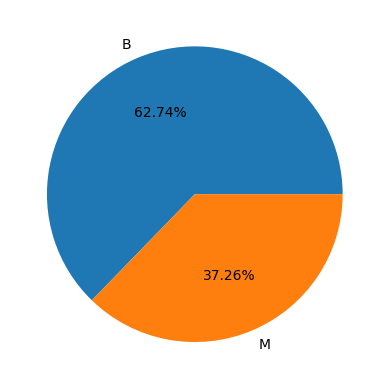

In [ ]:

plt.pie(df['diagnosis'].value_counts(),labels=df['diagnosis'].value_counts().index,autopct='%1.2f%%')
plt.show()


In [ ]:
px.pie(df, names='diagnosis', title='Diagnosis')

Resampling my Data

In [ ]:
rso = RandomOverSampler()
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']
X_res, y_res = rso.fit_resample(X, y)

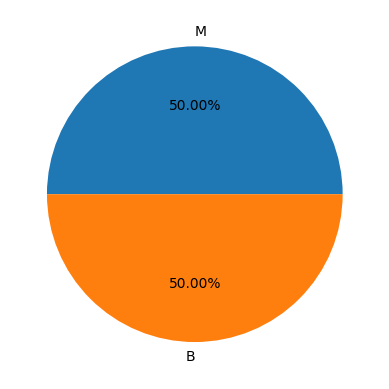

In [ ]:
plt.pie(y_res.value_counts(), labels = y_res.value_counts().index, autopct='%1.2f%%')
plt.show()

In [ ]:
df = pd.concat([X_res,y_res],axis=1)

In [ ]:
start_time = time.time()
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
end_time = time.time()
print(f"{end_time - start_time}")

0.006852149963378906


In [ ]:
start_time = time.time()
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)
end_time = time.time()
print(f"{end_time - start_time}")

0.0013341903686523438


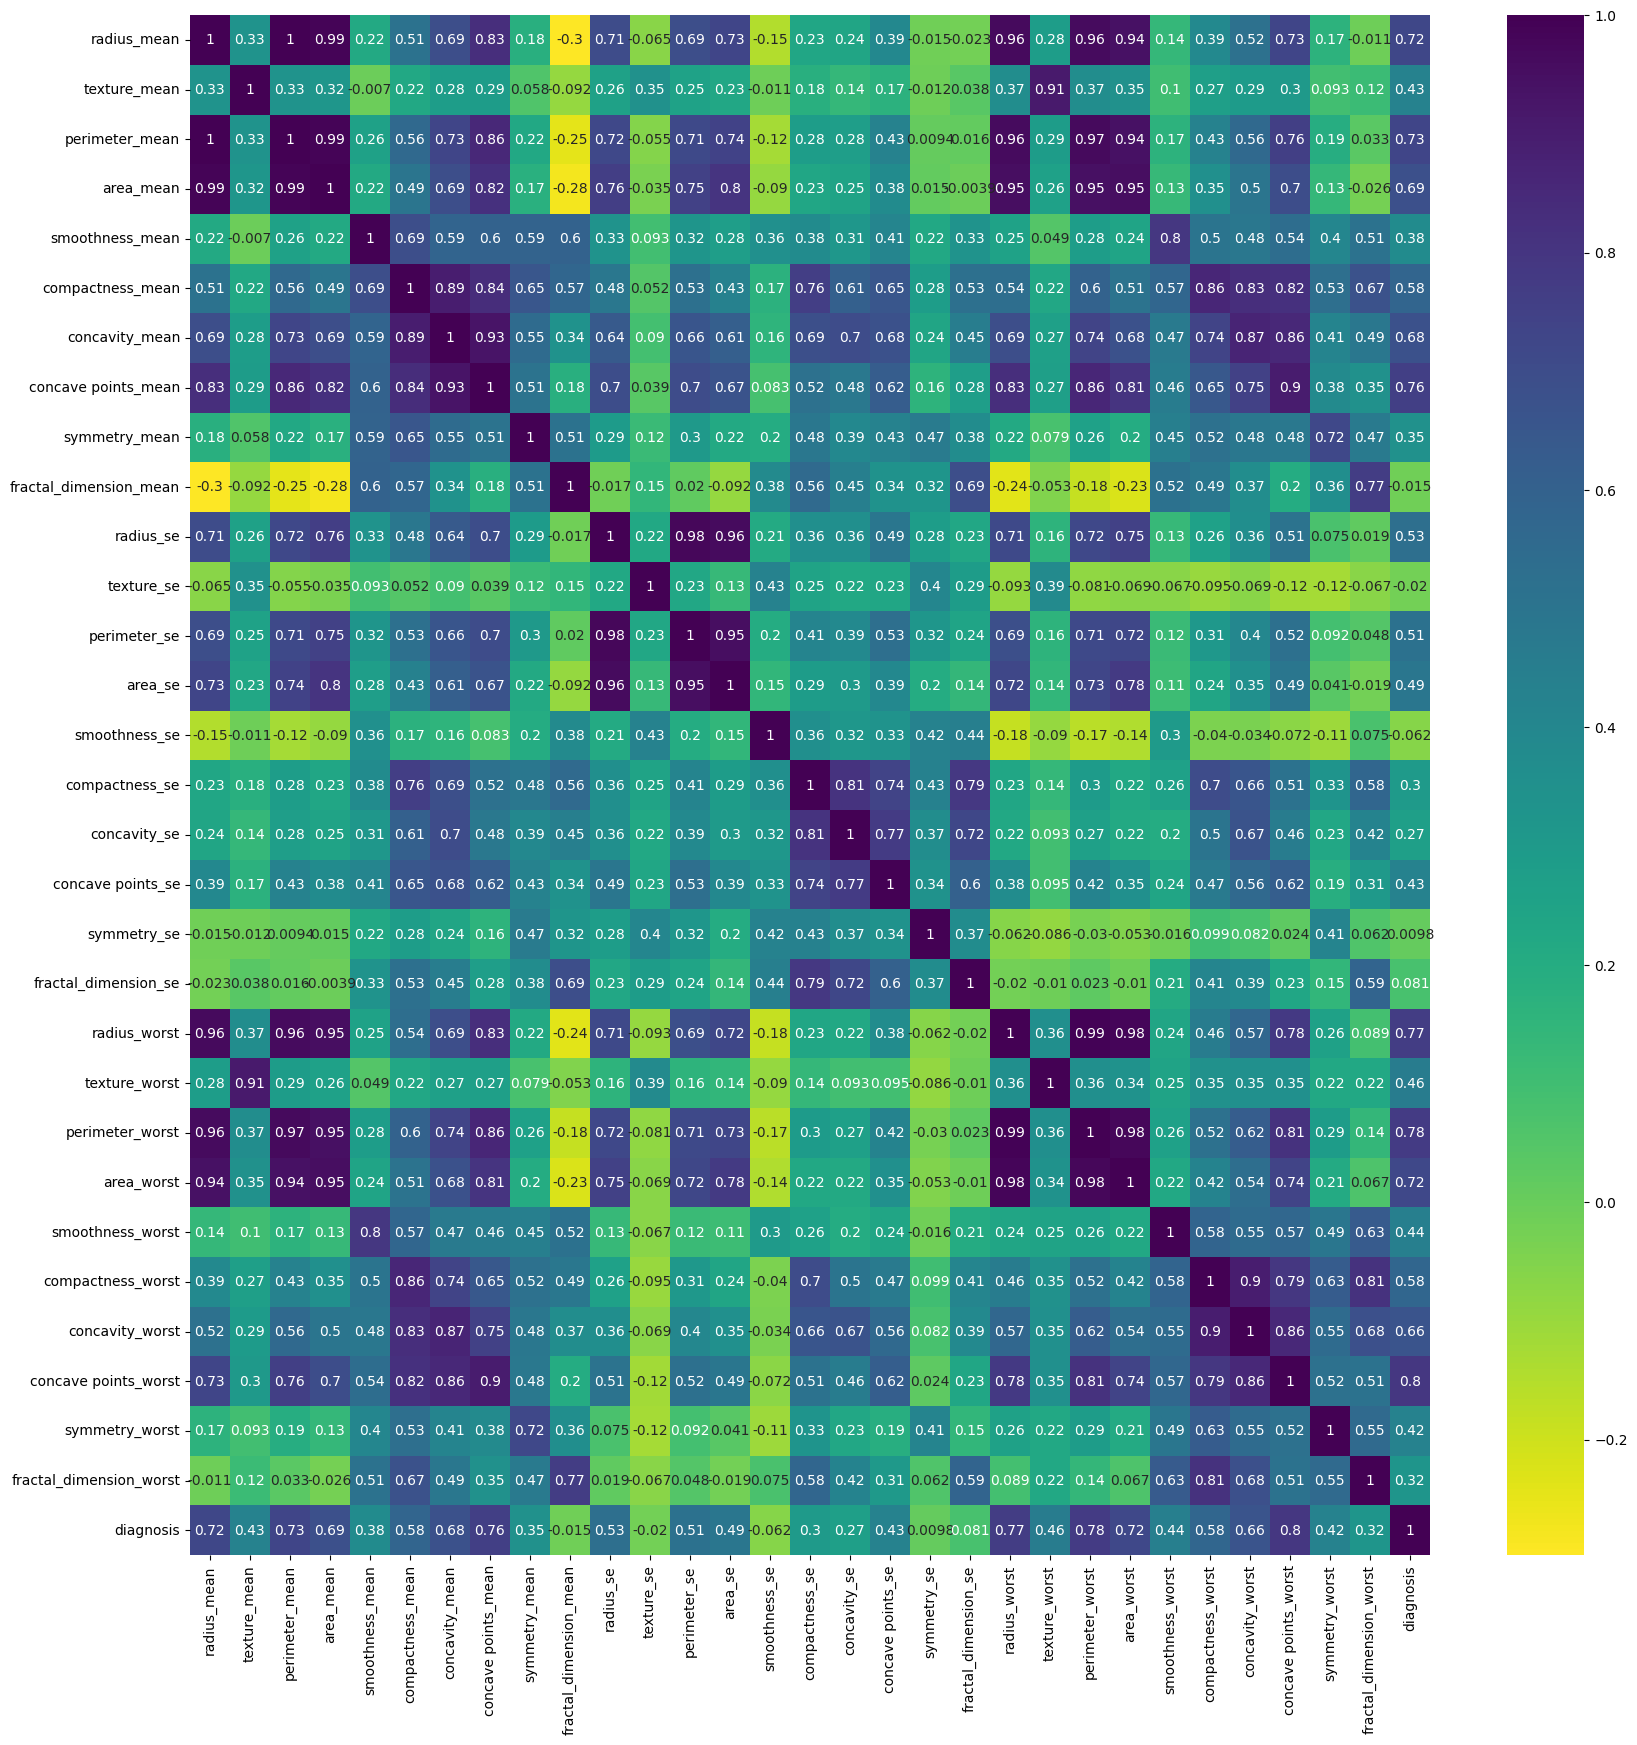

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='viridis_r',annot=True)
plt.show()

In [ ]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

In [ ]:
relevant_features = cor_target[cor_target>0.25]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

In [ ]:
names

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
names.remove('diagnosis')

In [ ]:
X = df[names].values
y = df['diagnosis'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Grid Search
grid = {
    'max_depth': [5,10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None]

}
knn = DecisionTreeClassifier()
cv = GridSearchCV(knn, grid, cv=5)
cv.fit(X_train, y_train)
print("Best Parameters:",cv.best_params_)
print("Training_score:",cv.best_score_)
print("Test_score:",cv.score(X_test,y_test))

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Training_score: 0.9447710184552289
Test_score: 0.9361702127659575


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Grid Search
grid = {
    'n_neighbors':np.arange(1,21),
    'metric':['euclidean', 'manhattan', 'minkowski' ],
    'p':np.arange(1,3),
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}
knn = KNeighborsClassifier()
cv = GridSearchCV(knn, grid, cv=5)
cv.fit(X_train, y_train)
print("Best Parameters:",cv.best_params_)
print("Training_score:",cv.best_score_)
print("Test_score:",cv.score(X_test,y_test))

Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Training_score: 0.9264866712235132
Test_score: 0.9627659574468085
